In [1]:
import experimental_design.config as config
parameter_space = config.get_parameter_space()

In [2]:
def to_single_value_dict(d: dict) -> dict:
    for k in d.keys():
        d[k] = d[k][0]
    return d

In [3]:
import pickle

random = False
mv = False
ivr = True

if random:
    timeloss_emukit_model = pickle.load(open('../experimental_design/models/250_random_points_supervised_GP_timeloss.pkl', "rb"))
    emissions_emukit_model = pickle.load(open('../experimental_design/models/270_random_points_supervised_GP_co2.pkl', "rb"))
elif mv:
    timeloss_emukit_model = pickle.load(open('../experimental_design/models/model_variance_20_init_points_250_loops_timeloss.pkl', "rb"))
    emissions_emukit_model = pickle.load(open('../experimental_design/models/model_variance_20_init_points_250_loops_co2.pkl', "rb"))
elif ivr:
    timeloss_emukit_model = pickle.load(open('../experimental_design/models/integrated_variance_reduction_20_init_points_250_loops_timeloss.pkl', "rb"))
    emissions_emukit_model = pickle.load(open('../experimental_design/models/integrated_variance_reduction_20_init_points_250_loops_co2.pkl', "rb"))

In [4]:
from emukit.sensitivity.monte_carlo import MonteCarloSensitivity

num_monte_carlo_points=500000

timeloss_sensitivity_sumo=MonteCarloSensitivity(model=timeloss_emukit_model, input_domain=parameter_space)
timeloss_main_effects, timeloss_total_effects, _ = timeloss_sensitivity_sumo.compute_effects(num_monte_carlo_points=num_monte_carlo_points)

emissions_sensitivity_sumo=MonteCarloSensitivity(model=emissions_emukit_model, input_domain=parameter_space)
emissions_main_effects, emissions_total_effects, _ = emissions_sensitivity_sumo.compute_effects(num_monte_carlo_points=num_monte_carlo_points)

In [5]:
main_effects_dict = {
    'Time Loss': to_single_value_dict(timeloss_main_effects),
    'Emissions': to_single_value_dict(emissions_main_effects),
}
total_effects_dict = {
    'Time Loss': to_single_value_dict(timeloss_total_effects),
    'Emissions': to_single_value_dict(emissions_total_effects),
}

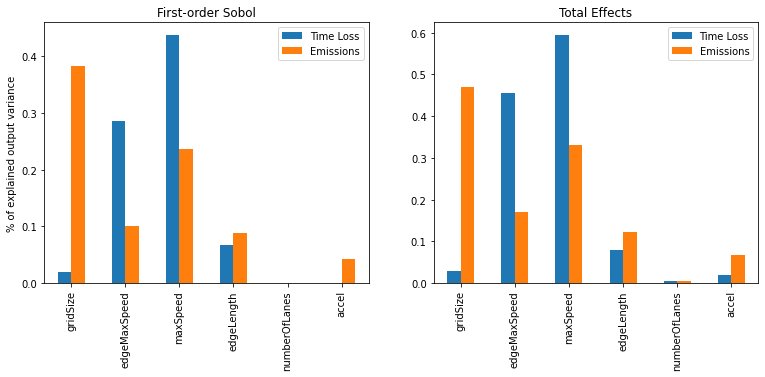

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[6.4 * 2, 4.8])
pd.DataFrame(main_effects_dict).plot.bar(ax=ax1)
ax1.set_title('First-order Sobol')
ax1.set_ylabel('% of explained output variance')
pd.DataFrame(total_effects_dict).plot.bar(ax=ax2)
ax2.set_title('Total Effects')
# ax2.set_ylabel('% of explained output variance')
plt.subplots_adjust(hspace=0.3)
fig.show()